# Results analysis

##  Average throughput and latency computations

In [ ]:
from crayfish_utils import get_measurements

measurements = get_measurements("../results-final/results")

Compute average measurements per experiment.

In [ ]:
from collections import defaultdict
import copy
import pprint
from statistics import mean

average_measurements = defaultdict(dict)

for exp_footprint in measurements:
    for stream_processor in measurements[exp_footprint]:
        for model_name in measurements[exp_footprint][stream_processor]:
            for model_format in measurements[exp_footprint][stream_processor][model_name]: 
                if exp_footprint not in average_measurements:
                    average_measurements[exp_footprint] = {}
                if stream_processor not in average_measurements[exp_footprint]:
                    average_measurements[exp_footprint][stream_processor] = {}
                if model_name not in average_measurements[exp_footprint][stream_processor]:
                    average_measurements[exp_footprint][stream_processor][model_name] = {}
                if model_format not in average_measurements[exp_footprint][stream_processor][model_name]:
                    average_measurements[exp_footprint][stream_processor][model_name][model_format] = {"throughput": [], "latency": []}
                           
                measurement = measurements[exp_footprint][stream_processor][model_name][model_format]
                for mm in measurement:
                    throughput = mm['throughput']
                    latency = mm['avg_latency']
                    average_measurements[exp_footprint][stream_processor][model_name][model_format]["throughput"].append(throughput)
                    average_measurements[exp_footprint][stream_processor][model_name][model_format]["latency"].append(latency)

final_measurements = copy.deepcopy(average_measurements)
for exp in average_measurements.keys():
    print(exp)
    for stream_processor in average_measurements[exp].keys():
        for model_name in average_measurements[exp][stream_processor]:
            for model_format in average_measurements[exp][stream_processor][model_name]:
                throughputs = average_measurements[exp][stream_processor][model_name][model_format]["throughput"]
                latencies = average_measurements[exp][stream_processor][model_name][model_format]["latency"]
                print(stream_processor, "-", model_name, "-", model_format)
                print("  throughputs:", throughputs, "\n  avg:", mean(throughputs))
                print("  latencies:", latencies, "\n  avg:", mean(latencies))
                final_measurements[exp][stream_processor][model_name][model_format]["throughput"] = mean(throughputs)
                final_measurements[exp][stream_processor][model_name][model_format]["latency"] = mean(latencies)# * 0.001
    print()

pprint.pprint(final_measurements)

# Comparison between serving alternatives

### Sustainable Throughput


In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from itertools import cycle
import itertools
import seaborn as sns
import random 

##### Flink

In [13]:
th_labels = ["512_1_1", "2048_1_1", "8192_1_1"]
ir = [512, 2048, 8192]
tfr_flink_nd4j = []
tfr_flink_onnx = []
tfr_flink_tf = []
tfr_flink_torchserve_cpu = []
tfr_flink_tf_serving_cpu = []
flinK_version = "flink"
for ts_l in th_labels:
    th_exps = final_measurements[ts_l]
    if flinK_version in th_exps:
        tfr_flink_nd4j.append(th_exps[flinK_version]["ffnn"]["dl4j"]["throughput"])
        tfr_flink_onnx.append(th_exps[flinK_version]["ffnn"]["onnx"]["throughput"])
        tfr_flink_tf.append(th_exps[flinK_version]["ffnn"]["tf-savedmodel"]["throughput"])
        if "torchserve" in th_exps[flinK_version]["ffnn"]:
            tfr_flink_torchserve_cpu.append(th_exps[flinK_version]["ffnn"]["torchserve"]["throughput"])
        if "tf-serving" in th_exps[flinK_version]["ffnn"]:
            tfr_flink_tf_serving_cpu.append(th_exps[flinK_version]["ffnn"]["tf-serving"]["throughput"])

print("Sustainable throughput achieved [FFNN, N-N-N setup]")
print("Flink DL4J:", max(tfr_flink_nd4j))
print("Flink ONNX:", max(tfr_flink_onnx))
print("Flink TF-SavedModel:", max(tfr_flink_tf))
print("Flink TorchServe-CPU:", max(tfr_flink_torchserve_cpu))
print("Flink TF-Serving-CPU:", max(tfr_flink_tf_serving_cpu))

Sustainable throughput achieved [FFNN, N-N-N setup]
Flink DL4J: 600.5736679676427
Flink ONNX: 1086.9872857464975
Flink TF-SavedModel: 1076.3953671943395
Flink TorchServe-CPU: 165.65957116769022
Flink TF-Serving-CPU: 457.3471000423886


In [14]:
th_labels = ["512_1_1", "2048_1_1", "8192_1_1"]
ir = [512, 2048, 8192]
tfr_flink_nd4j = []
tfr_flink_onnx = []
tfr_flink_tf = []
tfr_flink_torchserve_cpu = []
tfr_flink_tf_serving_cpu = []
flinK_version = "flink-32-N-32"
for ts_l in th_labels:
    th_exps = final_measurements[ts_l]
    if flinK_version in th_exps:
        tfr_flink_nd4j.append(th_exps[flinK_version]["ffnn"]["dl4j"]["throughput"])
        tfr_flink_onnx.append(th_exps[flinK_version]["ffnn"]["onnx"]["throughput"])
        tfr_flink_tf.append(th_exps[flinK_version]["ffnn"]["tf-savedmodel"]["throughput"])
        if "torchserve" in th_exps[flinK_version]["ffnn"]:
            tfr_flink_torchserve_cpu.append(th_exps[flinK_version]["ffnn"]["torchserve"]["throughput"])
        if "tf-serving" in th_exps[flinK_version]["ffnn"]:
            tfr_flink_tf_serving_cpu.append(th_exps[flinK_version]["ffnn"]["tf-serving"]["throughput"])

print("Sustainable throughput achieved [FFNN, 32-N-32 setup]")
print("Flink DL4J:", max(tfr_flink_nd4j))
print("Flink ONNX:", max(tfr_flink_onnx))
print("Flink TF-SavedModel:", max(tfr_flink_tf))
print("Flink TorchServe-CPU:", max(tfr_flink_torchserve_cpu))
print("Flink TF-Serving-CPU:", max(tfr_flink_tf_serving_cpu))

Sustainable throughput achieved [FFNN, 32-N-32 setup]
Flink DL4J: 1251.4102970707197
Flink ONNX: 4884.101950845772
Flink TF-SavedModel: 3347.727174016707
Flink TorchServe-CPU: 197.41696127453176
Flink TF-Serving-CPU: 746.5666803142982


In [18]:
th_labels = ["256_1_1", "512_1_1", "2048_1_1", "8192_1_1"]
ir = [512, 2048, 8192]
tfr_flink_nd4j = []
tfr_flink_onnx = []
tfr_flink_tf = []
tfr_flink_torchserve_cpu = []
tfr_flink_tf_serving_cpu = []
flinK_version = "flink"
for ts_l in th_labels:
    th_exps = final_measurements[ts_l]
    if flinK_version in th_exps:
        if "resnet50" in th_exps[flinK_version]:
            tfr_flink_onnx.append(th_exps[flinK_version]["resnet50"]["onnx"]["throughput"])
        if "resnet50" in th_exps[flinK_version]:
            tfr_flink_torchserve_cpu.append(th_exps[flinK_version]["resnet50"]["torchserve"]["throughput"])
            tfr_flink_tf_serving_cpu.append(th_exps[flinK_version]["resnet50"]["tf-serving"]["throughput"])

print("Sustainable throughput achieved [ResNet50, N-N-N setup]")
print("Flink ONNX:", max(tfr_flink_onnx))
print("Flink TorchServe-CPU:", max(tfr_flink_torchserve_cpu))
print("Flink TF-Serving-CPU:", max(tfr_flink_tf_serving_cpu))

Sustainable throughput achieved [ResNet50, N-N-N setup]
Flink ONNX: 2.168337438131018
Flink TorchServe-CPU: 0.6888708428989561
Flink TF-Serving-CPU: 1.9186297745448981


### KafkaStreams

In [19]:
th_labels = ["512_1_1", "2048_1_1", "8192_1_1"]
ir = [512, 2048, 8192]
tfr_flink_nd4j = []
tfr_flink_onnx = []
tfr_flink_tf = []
tfr_flink_torchserve_cpu = []
tfr_flink_tf_serving_cpu = []
flinK_version = "kafkastreams"
for ts_l in th_labels:
    th_exps = final_measurements[ts_l]
    if flinK_version in th_exps:
        if "onnx" in th_exps[flinK_version]["ffnn"]:
            tfr_flink_onnx.append(th_exps[flinK_version]["ffnn"]["onnx"]["throughput"])
        if "tf-serving" in th_exps[flinK_version]["ffnn"]:
            tfr_flink_tf_serving_cpu.append(th_exps[flinK_version]["ffnn"]["tf-serving"]["throughput"])

print("Maximum throughput achieved (FFNN)")
print("KafkStreams ONNX:", max(tfr_flink_onnx))
print("KafkStreams TF-Serving-CPU:", max(tfr_flink_tf_serving_cpu))

Maximum throughput achieved (FFNN)
KafkStreams ONNX: 1911.1996277729818
KafkStreams TF-Serving-CPU: 565.9257905271058


### Vertical Scalability
Plot throughput for increasing parallelism

#### FLINK

Parallelism on scoring operator: ['2', '4', '8', '16', '32']

Maximum throughput achieved (FFNN)
Flink DL4J: [1025.1206620110472, 1619.4087214876104, 2225.314585305209, 1888.778640180114, 1691.3529019105522]
Flink ONNX: [1912.1578986609509, 3756.4378797805507, 7391.934295090236, 13106.707695337205, 9541.98624420864]
Flink TF-SavedModel: [1762.7150512362507, 3504.067053827142, 6769.9917857433, 11425.08949653439, 10705.41551286077]
Flink TorchServe-CPU: [330.49974695908526, 630.764733340563, 1149.865848984285, 1935.8485598577279, 2222.6173541963017]
Flink TF-Serving-CPU: [910.676444357338, 1698.5370411719855, 3391.007758127369, 6216.880140956746, 8148.75771583997]

Maximum throughput achieved (ResNet50)
Flink ONNX: [4.234919738130333, 8.477385698251787, 13.687092918625163, 23.02585080398886, 19.97797416946794]
Flink TorchServe-CPU: [1.388001292246122, 2.6859263775768225, 5.427874070801421, 8.550214992277485, 9.532608151770635]
Flink TF-Serving-CPU: [3.87553519605419, 4.390825419856871, 4

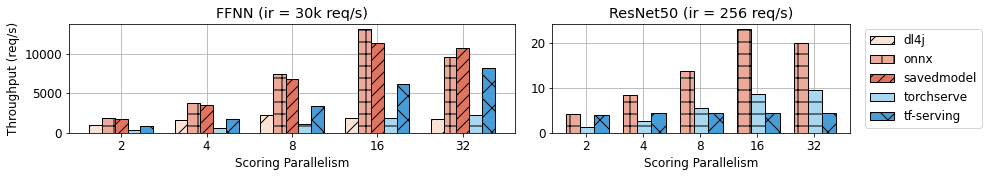

In [22]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 16
font = {'size'   : 12}
matplotlib.rc('font', **font)
alpha = 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 2), gridspec_kw={'width_ratios': [3, 2]})

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])

colors = itertools.cycle(['#FAE3D4', '#ECAB9A', '#DF7461', '#A8D8F0', '#479DD7'])

ir = ['2', '4', '8', '16', '32']
scl_labels = ["30000_1_2", "30000_1_4", "30000_1_8", "30000_1_16", "30000_1_32"]

sc_flink_nd4j = []
sc_flink_onnx = []
sc_flink_tf = []
sc_flink_torchserve_cpu = []
sc_flink_tf_serving_cpu = []
flink_version = "flink"
for sc in scl_labels:
    sc_exps = final_measurements[sc]
    sc_flink_nd4j.append(sc_exps[flink_version]["ffnn"]["dl4j"]["throughput"])
    if "onnx" in sc_exps[flink_version]["ffnn"]:
        sc_flink_onnx.append(sc_exps[flink_version]["ffnn"]["onnx"]["throughput"])
    else:
        sc_flink_onnx.append(0)
    sc_flink_tf.append(sc_exps[flink_version]["ffnn"]["tf-savedmodel"]["throughput"])
    if "torchserve" in sc_exps[flink_version]["ffnn"]:
        sc_flink_torchserve_cpu.append(sc_exps[flink_version]["ffnn"]["torchserve"]["throughput"])
    else:
        sc_flink_torchserve_cpu.append(0)
    if "tf-serving" in sc_exps[flink_version]["ffnn"]:
        sc_flink_tf_serving_cpu.append(sc_exps[flink_version]["ffnn"]["tf-serving"]["throughput"])
    else:
        sc_flink_tf_serving_cpu.append(0)

print("Parallelism on scoring operator:", ir)
print("\nMaximum throughput achieved (FFNN)")
print("Flink DL4J:", sc_flink_nd4j)
print("Flink ONNX:", sc_flink_onnx)
print("Flink TF-SavedModel:", sc_flink_tf)
print("Flink TorchServe-CPU:", sc_flink_torchserve_cpu)
print("Flink TF-Serving-CPU:", sc_flink_tf_serving_cpu)

width = 0.15
X = np.arange(len(ir))

ax1.bar(X, sc_flink_nd4j, width = width, label='dl4j', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + width, sc_flink_onnx, width = width, label='onnx', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 2 * width, sc_flink_tf, width = width, label='savedmodel', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 3 * width, sc_flink_torchserve_cpu, width = width, label='torchserve', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 4 * width, sc_flink_tf_serving_cpu, width = width, label='tf-serving', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.set_xticks([i + 0.3 for i in X], ir)
ax1.set_xlabel('Scoring Parallelism')
ax1.set_ylabel('Throughput (req/s)')
ax1.set_axisbelow(True)
ax1.grid(True)
ax1.set_title('FFNN (ir = 30k req/s)')

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#FAE3D4', '#ECAB9A', '#DF7461', '#A8D8F0', '#479DD7'])

ir = ['2', '4', '8', '16', '32']
scl_labels = ["256_1_2", "256_1_4", "256_1_8", "256_1_16", "256_1_32"]

sc_flink_nd4j = []
sc_flink_onnx = []
sc_flink_tf = []
sc_flink_torchserve_cpu = []
sc_flink_tf_serving_cpu = []
flink_version = "flink"
model = "resnet50"
for sc in scl_labels:
    sc_exps = final_measurements[sc]
    if "onnx" in sc_exps[flink_version][model]:
        sc_flink_onnx.append(sc_exps[flink_version][model]["onnx"]["throughput"])
    else:
        sc_flink_onnx.append(0)
    if "torchserve" in sc_exps[flink_version][model]:
        sc_flink_torchserve_cpu.append(sc_exps[flink_version][model]["torchserve"]["throughput"])
    else:
        sc_flink_torchserve_cpu.append(0)
    if "tf-serving" in sc_exps[flink_version][model]:
        sc_flink_tf_serving_cpu.append(sc_exps[flink_version][model]["tf-serving"]["throughput"])
    else:
        sc_flink_tf_serving_cpu.append(0)
    sc_flink_nd4j.append(0)
    sc_flink_tf.append(0)

print("\nMaximum throughput achieved (ResNet50)")
print("Flink ONNX:", sc_flink_onnx)
print("Flink TorchServe-CPU:", sc_flink_torchserve_cpu)
print("Flink TF-Serving-CPU:", sc_flink_tf_serving_cpu)

width = 0.25
X = np.arange(len(ir))

next(colors)
next(hatches)
ax2.bar(X + width, sc_flink_onnx, width = width, label='onnx', color=next(colors), hatch = next(hatches), edgecolor='black')
next(colors)
next(hatches)
ax2.bar(X + 2 * width, sc_flink_torchserve_cpu, width = width, label='torchserve', color=next(colors), hatch = next(hatches), edgecolor='black')
ax2.bar(X + 3 * width, sc_flink_tf_serving_cpu, width = width, label='tf-serving', color=next(colors), hatch = next(hatches), edgecolor='black')


ax2.set_xticks([i + 0.48 for i in X], ir)
ax2.set_xlabel('Scoring Parallelism')
ax2.set_axisbelow(True)
ax2.grid(True)
ax2.set_title('ResNet50 (ir = 256 req/s)')

ax1.legend(ncol=1, loc='center left', bbox_to_anchor=(1.77, 0.5))
plt.subplots_adjust(wspace=0.1, hspace=0)

plt.savefig('flink-scabaility.pdf', bbox_inches='tight')

### Latency
Plot latency for varying batch sizes

#### FLINK

Flink DL4J: [56.05045871559633, 207.04147465437788, 768.6451612903226]
Flink ONNX: [53.87844036697248, 167.4401133048662, 758.7926267281107]
Flink TF-SavedModel: [59.83333333333333, 190.69761904761904, 771.3732718894009]
Flink TorchServe-CPU: [171.54418604651164, 594.6, 2352.3598130841124]
Flink TF-Serving-CPU: [60.11162790697674, 173.2186046511628, 757.2093023255813]


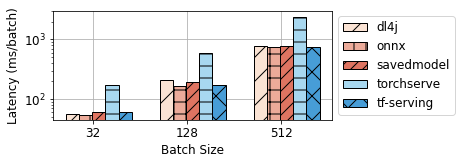

In [23]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 14
font = {'size'   : 12}
matplotlib.rc('font', **font)
alpha = 1

fig, ax1 = plt.subplots(1,figsize=(5, 2))

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#FAE3D4', '#ECAB9A', '#DF7461', '#A8D8F0', '#479DD7'])

bs = ['32', '128', '512']
scl_labels = ["1_32_1", "1_128_1", "1_512_1"]

sc_flink_nd4j = []
sc_flink_onnx = []
sc_flink_tf = []
sc_flink_torchserve_cpu = []
sc_flink_tf_serving_cpu = []
flink_version = "flink"
for sc in scl_labels:
    sc_exps = final_measurements[sc]
    sc_flink_nd4j.append(sc_exps[flink_version]["ffnn"]["dl4j"]["latency"])
    sc_flink_onnx.append(sc_exps[flink_version]["ffnn"]["onnx"]["latency"])
    if "tf-savedmodel" in sc_exps[flink_version]["ffnn"]:
        sc_flink_tf.append(sc_exps[flink_version]["ffnn"]["tf-savedmodel"]["latency"])
    else:
        sc_flink_tf.append(0)
    sc_flink_torchserve_cpu.append(sc_exps[flink_version]["ffnn"]["torchserve"]["latency"])
    sc_flink_tf_serving_cpu.append(sc_exps[flink_version]["ffnn"]["tf-serving"]["latency"])
    
print("Flink DL4J:", sc_flink_nd4j)
print("Flink ONNX:", sc_flink_onnx)
print("Flink TF-SavedModel:", sc_flink_tf)
print("Flink TorchServe-CPU:", sc_flink_torchserve_cpu)
print("Flink TF-Serving-CPU:", sc_flink_tf_serving_cpu)
 
X = np.arange(len(bs))
width = 0.14

ax1.bar(X, sc_flink_nd4j, width = width, label='dl4j', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + width, sc_flink_onnx, width = width, label='onnx', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 2 * width, sc_flink_tf, width = width, label='savedmodel', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 3 * width, sc_flink_torchserve_cpu, width = width, label='torchserve', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 4 * width, sc_flink_tf_serving_cpu, width = width, label='tf-serving', color=next(colors), hatch = next(hatches), edgecolor='black')

ax1.set_xticks([i + 0.22 for i in X], bs)
ax1.set_yscale('log')
ax1.set_ylim(ymax=3000)
ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Latency (ms/batch)')
ax1.set_axisbelow(True)
ax1.grid(True)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('flink-ffnn-latency-aggregates.pdf', bbox_inches='tight')

# Comparison between stream processors

## Sustainable throughput


Maximum throughput achieved
KafkaStreams ONNX: 1618.635955973074
KafkaStreams TF-Serving-CPU: 534.1561878062143
Flink ONNX: 1028.8856229886703
Flink TF-Serving: 455.66705032781795
Ray ONNX: 118.96717333142291
Ray TF-serving: 65.5389102351941
Spark SS ONNX: 259.0357899693902
Spark SS TF-serving: 232.2164734115858


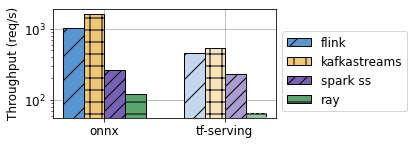

In [26]:
import math

mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 16
font = {'size'   : 12}
matplotlib.rc('font', **font)
alpha = 1

fig, ax1 = plt.subplots(1,figsize=(4, 2))

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#5896D1', '#EEC876', '#7661B4', '#5AA56D'])
colors_light = itertools.cycle(['#C3D8EE', '#F7E4BC', '#A99CD0', '#94C39F'])

th_labels = ["512_1_1", "1024_1_1", "4096_1_1", "8192_1_1"]
ir = ['onnx', 'tf-serving']
tfr_ks_onnx = []
tfr_ks_tf_serving = []
for ts_l in th_labels:
    th_exps = final_measurements[ts_l]
    if "kafkastreams" in th_exps:
        tfr_ks_onnx.append(th_exps["kafkastreams"]["ffnn"]["onnx"]["throughput"])
        if "tf-serving" in th_exps["kafkastreams"]["ffnn"]:
            tfr_ks_tf_serving.append(th_exps["kafkastreams"]["ffnn"]["tf-serving"]["throughput"])
        else:
            tfr_ks_tf_serving.append(0)

print("\nMaximum throughput achieved")
print("KafkaStreams ONNX:", max(tfr_ks_onnx))
print("KafkaStreams TF-Serving-CPU:", max(tfr_ks_tf_serving))

tfr_flink_onnx = []
tfr_flink_tf_serving_cpu = []

flink_version = "flink"
for ts_l in th_labels:
    th_exps = final_measurements[ts_l]
    if flink_version in th_exps:
        tfr_flink_onnx.append(th_exps[flink_version]["ffnn"]["onnx"]["throughput"])
        if "tf-serving" in th_exps[flink_version]["ffnn"]:
            tfr_flink_tf_serving_cpu.append(th_exps[flink_version]["ffnn"]["tf-serving"]["throughput"])
        else:
            tfr_flink_tf_serving_cpu.append(0)

print("Flink ONNX:", max(tfr_flink_onnx))
print("Flink TF-Serving:", max(tfr_flink_tf_serving_cpu))

tfr_ray_onnx = []
tfr_ray_tf_serving_cpu = []

for ts_l in th_labels:
    th_exps = final_measurements[ts_l]
    if "ray" in th_exps:
        if "onnx" in th_exps["ray"]["ffnn"]:
            tfr_ray_onnx.append(th_exps["ray"]["ffnn"]["onnx"]["throughput"])
        else:
            tfr_ray_onnx.append(0)
        if "tf-serving" in th_exps["ray"]["ffnn"]:
            tfr_ray_tf_serving_cpu.append(th_exps["ray"]["ffnn"]["tf-serving"]["throughput"])
        else:
            tfr_ray_tf_serving_cpu.append(0)

print("Ray ONNX:", max(tfr_ray_onnx))
print("Ray TF-serving:", max(tfr_ray_tf_serving_cpu))


tfr_spark_onnx = []
tfr_spark_tf_serving_cpu = []

for ts_l in th_labels:
    th_exps = final_measurements[ts_l]
    if "sparkss" in th_exps:
        if "onnx" in th_exps["sparkss"]["ffnn"]:
            tfr_spark_onnx.append(th_exps["sparkss"]["ffnn"]["onnx"]["throughput"])
        else:
            tfr_spark_onnx.append(0)
        if "tf-serving" in th_exps["sparkss"]["ffnn"]:
            tfr_spark_tf_serving_cpu.append(th_exps["sparkss"]["ffnn"]["tf-serving"]["throughput"])
        else:
            tfr_spark_tf_serving_cpu.append(0)

print("Spark SS ONNX:", max(tfr_spark_onnx))
print("Spark SS TF-serving:", max(tfr_spark_tf_serving_cpu))

flink_onnx = max(tfr_flink_onnx)
flink_tfserving = max(tfr_flink_tf_serving_cpu)
ks_onnx = max(tfr_ks_onnx)
ks_tfserving = max(tfr_ks_tf_serving)
ray_onnx = max(tfr_ray_onnx)
ray_tfsavedmodel = max(tfr_ray_tf_serving_cpu)
spark_onnx = max(tfr_spark_onnx)
spark_tfsavedmodel = max(tfr_spark_tf_serving_cpu)

flink = [flink_onnx, flink_tfserving]
ks = [ks_onnx, ks_tfserving]
ray = [ray_onnx, ray_tfsavedmodel]
spark = [spark_onnx, spark_tfsavedmodel]


width = 0.17
X = np.arange(len(ir))

ax1.bar(X, flink, width = width, label='flink', color=[next(colors), next(colors_light)], hatch = next(hatches), edgecolor='black')
ax1.bar(X + width, ks, width = width, label='kafkastreams', color=[next(colors), next(colors_light)], hatch = next(hatches), edgecolor='black')
ax1.bar(X + 2 * width, spark, width = width, label='spark ss', color=[next(colors), next(colors_light)], hatch = next(hatches), edgecolor='black')
bars = ax1.bar(X + 3 * width, ray, width = width, label='ray', color=[next(colors), next(colors_light)], hatch = next(hatches), edgecolor='black')

bars[1].set_linestyle('--')

ax1.set_xticks([i + 0.25 for i in X], ir)
ax1.set_ylabel('Throughput (req/s)')
ax1.set_axisbelow(True)
ax1.grid(True)
ax1.set_yscale('log')

handles, labels = ax1.get_legend_handles_labels()
unique_labels = list(np.unique(labels))

combined_handles = [tuple([h for h, l in zip(handles, labels) if l == label]) for label in unique_labels]

ax1.legend(ncol=1, bbox_to_anchor=(1, 0.85))

plt.savefig('stream-processors-comparison-throughput.pdf', bbox_inches='tight')

### Latency under sustainable throughput

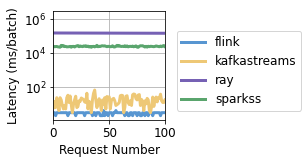

In [51]:
import glob

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 16
font = {'size'   : 12}
matplotlib.rc('font', **font)
alpha = 1


systems = ["flink", "kafkastreams", "ray", "sparkss"]
fig, ax1 = plt.subplots(1, 1, figsize=(2, 2))
timestamps = 150
colors = itertools.cycle(['#5896D1', '#EEC876', '#7661B4', '#5AA56D'])

for s in systems:
    times = []
    tt = []
    with open(glob.glob("../results-final/results/" + s + "/ffnn/onnx/*-ir512-bs1-mr1.csv")[0]) as f_in:
        for line in f_in:
            t = list(map(int, line.rstrip('\n').split(",")))
            tt.append(t)
        tt = sorted(tt, key=lambda x: x[1])
        for t in tt:
            times.append(t[1] - t[0])

    sz = int(0.25 * len(times))
    times = times[sz:]
    ax1.plot(range(timestamps), times[0:timestamps], label=s, color=next(colors))

ax1.set_yscale('log')
ax1.set_ylim(ymax=3000000)
ax1.set_xlim((0, 100))

ax1.grid(True)

ax1.legend(ncol=1, loc='center left', bbox_to_anchor=(1.05, 0.45))
ax1.set_ylabel('Latency (ms/batch)')
ax1.set_xlabel('Request Number')


plt.savefig('stream-processors-comparison-latency-over-time-sust-throughp.pdf', bbox_inches='tight')

### Vertical Scalability

Parallelism on scoring operator: [2, 4, 8, 16, 32]

Maximum throughput achieved

Flink ONNX:
 [1912.1578986609509, 3756.4378797805507, 7391.934295090236, 13106.707695337205, 9541.98624420864]

Flink TF-Serving-CPU:
 [910.676444357338, 1698.5370411719855, 3391.007758127369, 6216.880140956746, 8148.75771583997]

KafkaStreams ONNX:
 [3154.6332391845403, 5995.314875758022, 11875.749463289205, 22348.658066971562, 23008.252293155812]

KafkaStreams TF-Serving-CPU:
 [1067.6521898674514, 2062.1640235482055, 3996.9475328097355, 7059.18770719415, 9830.264106428993]

Ray ONNX:
 [224.19407815126533, 446.9596655417355, 662.9989108422812, 706.0146353069032, 737.4759985737168]

Ray TF-Serving-CPU:
 [131.99174488404685, 234.53942744081672, 343.5329597532413, 344.1375282508428, 347.225617101072]

SparkSS ONNX:
 [243.8444054400275, 243.4921818992075, 244.51449716274396, 242.98060080097105, 241.80079478851005]

SparkSS TF-Serving-CPU:
 [210.06442537978756, 207.5406029517477, 210.73156649413863, 211.238329

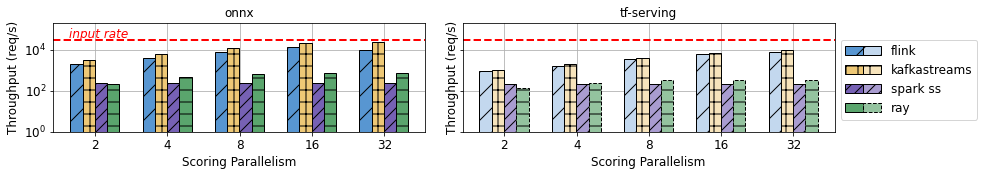

In [30]:
from matplotlib.legend_handler import HandlerTuple

mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 16
font = {'size'   : 12}
matplotlib.rc('font', **font)
alpha = 1

fig, [ax1, ax2] = plt.subplots(1, 2 ,figsize=(14, 2), sharey=True)

ir = ['onnx', 'tf-serving']
labels = ['2', '4', '8', '16', '32']
scl_labels = ["30000_1_2", "30000_1_4", "30000_1_8", "30000_1_16", "30000_1_32"]

sc_flink_onnx = []
sc_flink_tf_serving_cpu = []
sc_ks_onnx = []
sc_ks_tf_serving_cpu = []
sc_ray_onnx = []
sc_ray_tf_serving_cpu = []
sc_spark_onnx = []
sc_spark_tf_serving_cpu = []
flink_version = "flink"
for sc in scl_labels:
    sc_exps = final_measurements[sc]
    if "onnx" in sc_exps[flink_version]["ffnn"]:
        sc_flink_onnx.append(sc_exps[flink_version]["ffnn"]["onnx"]["throughput"])
    else:
        sc_flink_onnx.append(1)
    sc_flink_tf_serving_cpu.append(sc_exps[flink_version]["ffnn"]["tf-serving"]["throughput"])
    if "kafkastreams" in sc_exps:
        sc_ks_onnx.append(sc_exps["kafkastreams"]["ffnn"]["onnx"]["throughput"])
        sc_ks_tf_serving_cpu.append(sc_exps["kafkastreams"]["ffnn"]["tf-serving"]["throughput"])
    else:
        sc_ks_onnx.append(1)
        sc_ks_tf_serving_cpu.append(1)
    if "ray" in sc_exps:
        sc_ray_onnx.append(sc_exps["ray"]["ffnn"]["onnx"]["throughput"])
        sc_ray_tf_serving_cpu.append(sc_exps["ray"]["ffnn"]["tf-serving"]["throughput"])
    else:
        sc_ray_onnx.append(1)
        sc_ray_tf_serving_cpu.append(1)
    if "sparkss" in sc_exps:
        sc_spark_onnx.append(sc_exps["sparkss"]["ffnn"]["onnx"]["throughput"])
        sc_spark_tf_serving_cpu.append(sc_exps["sparkss"]["ffnn"]["tf-serving"]["throughput"])
    else:
        sc_spark_onnx.append(1)
        sc_spark_tf_serving_cpu.append(1)

X = np.arange(len(labels))

width = 0.17

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#5896D1', '#EEC876', '#7661B4', '#5AA56D'])

ax1.bar(X, sc_flink_onnx, width = width, label='flink', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + width, sc_ks_onnx, width = width, label='kafkastreams', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 2 * width, sc_spark_onnx, width = width, label='spark ss', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 3 * width, sc_ray_onnx, width = width, label='ray', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.set_yscale('log')


hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#C3D8EE', '#F7E4BC', '#A99CD0', '#94C39F'])


ax2.bar(X, sc_flink_tf_serving_cpu, width = width, label='flink', color=next(colors), hatch = next(hatches), edgecolor='black')
ax2.bar(X + width, sc_ks_tf_serving_cpu, width = width, label='kafkastreams', color=next(colors), hatch = next(hatches), edgecolor='black')
ax2.bar(X + 2 * width, sc_spark_tf_serving_cpu, width = width, label='spark ss', color=next(colors), hatch = next(hatches), edgecolor='black')
bars = ax2.bar(X + 3 * width, sc_ray_tf_serving_cpu, width = width, label='ray', color=next(colors), hatch = next(hatches), edgecolor='black')
for bar in bars:
    bar.set_linestyle('--')
ax2.set_yscale('log')


axs = [ax1, ax2]

for ax in axs:
    ax.set_xlabel('Scoring Parallelism')
    ax.set_ylabel('Throughput (req/s)')
    ax.set_axisbelow(True)
    ax.grid(True)
    ax.set_yscale('log')
    ax.axhline(y=30000, color='r', linestyle='--', linewidth=2)
    ax.set_ylim([1, 200000])
    ax.set_xticks([int(i) + 0.26 for i in X], labels)

ax1.text(-0.1, 40000, 'input rate', color='r', fontsize=12, fontstyle='oblique')
ax1.set_title('onnx', fontsize=12)
ax2.set_title('tf-serving', fontsize=12)

handles, labels = axs[0].get_legend_handles_labels()
handles2, labels2 = axs[1].get_legend_handles_labels()
labels = labels + labels2
handles = handles + handles2
unique_labels = ['flink', 'kafkastreams', 'spark ss', 'ray']
combined_handles = [tuple([h for h, l in zip(handles, labels) if l == label]) for label in unique_labels]

axs[1].legend(handles=combined_handles, labels=unique_labels, handlelength=3,
          handler_map={tuple: HandlerTuple(ndivide=None, pad=0)}, bbox_to_anchor=(1, 0.9))

plt.subplots_adjust(wspace=0.1, hspace=0)
plt.savefig('stream-processors-comparison-scalability.pdf', bbox_inches='tight')

print("Parallelism on scoring operator:", [2, 4, 8, 16, 32])
print("\nMaximum throughput achieved")
print("\nFlink ONNX:\n", sc_flink_onnx)
print("\nFlink TF-Serving-CPU:\n", sc_flink_tf_serving_cpu)
print("\nKafkaStreams ONNX:\n", sc_ks_onnx)
print("\nKafkaStreams TF-Serving-CPU:\n", sc_ks_tf_serving_cpu)
print("\nRay ONNX:\n", sc_ray_onnx)
print("\nRay TF-Serving-CPU:\n", sc_ray_tf_serving_cpu)
print("\nSparkSS ONNX:\n", sc_spark_onnx)
print("\nSparkSS TF-Serving-CPU:\n", sc_spark_tf_serving_cpu)

### End-to-end Latency

Parallelism on scoring operator: ['32', '128', '512']

Maximum throughput achieved
Flink ONNX: [53.87844036697248, 167.4401133048662, 758.7926267281107]
Flink TF-Serving-CPU: [60.11162790697674, 173.2186046511628, 757.2093023255813]
KafkaStreams ONNX: [134.40552995391704, 201.58986175115206, 513.8778801843318]
KafkaStreams TF-Serving-CPU: [136.5325581395349, 232.06451612903226, 522.7213625521765]
Ray ONNX: [3047.10997949419, 3113.049213943951, 3394.193779904306]
Ray TF-SavedModel: [68.5974358974359, 175.03333333333333, 640.2333333333333]
Spark SS ONNX: [3604.6172248803828, 3663.9665071770337, 3907.0813397129186]
Spark SS TF-SavedModel: [625.6948717948717, 710.1128205128205, 1042.4435897435897]


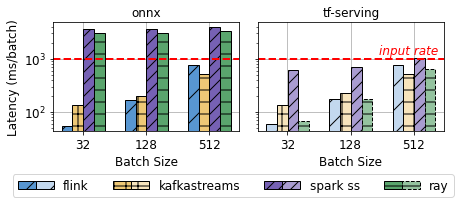

In [32]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 16
font = {'size'   : 12}
matplotlib.rc('font', **font)
alpha = 1

fig, [ax1, ax2] = plt.subplots(1, 2 ,figsize=(7, 2), sharey=True)

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#5896D1', '#EEC876', '#7661B4', '#5AA56D'])
ir = ['32', '128', '512']
scl_labels = ["1_32_1", "1_128_1", "1_512_1"]
flink_version = "flink"

sc_flink_onnx = []
sc_flink_tf_serving_cpu = []
sc_ks_onnx = []
sc_ks_tf_serving_cpu = []
sc_ray_onnx = []
sc_ray_tf_serving_cpu = []
sc_spark_onnx = []
sc_spark_tf_serving_cpu = []
for sc in scl_labels:
    sc_exps = final_measurements[sc]
    sc_flink_onnx.append(sc_exps[flink_version]["ffnn"]["onnx"]["latency"])
    sc_flink_tf_serving_cpu.append(sc_exps[flink_version]["ffnn"]["tf-serving"]["latency"])
    sc_ks_onnx.append(sc_exps["kafkastreams"]["ffnn"]["onnx"]["latency"])
    sc_ks_tf_serving_cpu.append(sc_exps["kafkastreams"]["ffnn"]["tf-serving"]["latency"])
    if "ray" in sc_exps:
        sc_ray_onnx.append(sc_exps["ray"]["ffnn"]["onnx"]["latency"])
        sc_ray_tf_serving_cpu.append(sc_exps["ray"]["ffnn"]["tf-serving"]["latency"])
    else:
        sc_ray_onnx.append(0)
        sc_ray_tf_serving_cpu.append(0)
    if "sparkss" in sc_exps:
        sc_spark_onnx.append(sc_exps["sparkss"]["ffnn"]["onnx"]["latency"])
        sc_spark_tf_serving_cpu.append(sc_exps["sparkss"]["ffnn"]["tf-serving"]["latency"])
    else:
        sc_spark_onnx.append(0)
        sc_spark_tf_serving_cpu.append(0)

print("Parallelism on scoring operator:", ir)
print("\nMaximum throughput achieved")
print("Flink ONNX:", sc_flink_onnx)
print("Flink TF-Serving-CPU:", sc_flink_tf_serving_cpu)
print("KafkaStreams ONNX:", sc_ks_onnx)
print("KafkaStreams TF-Serving-CPU:", sc_ks_tf_serving_cpu)
print("Ray ONNX:", sc_ray_onnx)
print("Ray TF-SavedModel:", sc_ray_tf_serving_cpu)
print("Spark SS ONNX:", sc_spark_onnx)
print("Spark SS TF-SavedModel:", sc_spark_tf_serving_cpu)

X = np.arange(len(ir))
width = 0.17
# -----
ax1.bar(X, sc_flink_onnx, width = width, label='flink', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + width, sc_ks_onnx, width = width, label='kafkastreams', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 2 * width, sc_spark_onnx, width = width, label='spark ss', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + 3 * width, sc_ray_onnx, width = width, label='ray', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.set_xticks([i + 0.25 for i in X], ir)
ax1.set_ylabel('Latency (ms/batch)')
ax1.set_xlabel('Batch Size')
ax1.set_title('onnx', fontsize=12)

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#C3D8EE', '#F7E4BC', '#A99CD0', '#94C39F'])
ax2.bar(X, sc_flink_tf_serving_cpu, width = width, label='flink', color=next(colors), hatch = next(hatches), edgecolor='black')
ax2.bar(X + width, sc_ks_tf_serving_cpu, width = width, label='kafkastreams', color=next(colors), hatch = next(hatches), edgecolor='black')
ax2.bar(X + 2 * width, sc_spark_tf_serving_cpu, width = width, label='spark ss', color=next(colors), hatch = next(hatches), edgecolor='black')
bars = ax2.bar(X + 3 * width, sc_ray_tf_serving_cpu, width = width, label='ray', color=next(colors), hatch = next(hatches), edgecolor='black')
ax2.set_xticks([i + 0.25 for i in X], ir)
ax2.set_title('tf-serving', fontsize=12)
ax2.set_xlabel('Batch Size')

for bar in bars:
    bar.set_linestyle('--')
ax2.set_yscale('log')

axs = [ax1, ax2]

for ax in axs:
    ax.set_axisbelow(True)
    ax.grid(True)
    ax.set_yscale('log')
    ax.axhline(y=1000, color='r', linestyle='--', linewidth=2)

ax2.text(1.7, 1200, 'input rate', color='r', fontsize=12, fontstyle='oblique')

handles, labels = axs[0].get_legend_handles_labels()
handles2, labels2 = axs[1].get_legend_handles_labels()
labels = labels + labels2
handles = handles + handles2
unique_labels = ['flink', 'kafkastreams', 'spark ss', 'ray']
combined_handles = [tuple([h for h, l in zip(handles, labels) if l == label]) for label in unique_labels]

axs[1].legend(handles=combined_handles, labels=unique_labels, handlelength=3,
          handler_map={tuple: HandlerTuple(ndivide=None, pad=0)}, ncol=4, loc='center left', bbox_to_anchor=(-1.35, -0.5))

plt.subplots_adjust(wspace=0.1, hspace=0)
plt.savefig('stream-processors-comparison-latency.pdf', bbox_inches='tight')

# Parallelism Models

Parallelism on scoring operator: ['2', '4', '8', '16', '32']

Maximum throughput achieved
Flink 32-N-32 ONNX: [6573.714985974195, 12206.730338002246, 14957.830468848588, 13261.231122755064, 13497.50979937864]
Flink N-N-N ONNX: [1912.1578986609509, 3756.4378797805507, 7391.934295090236, 13106.707695337205, 9541.98624420864]
Flink N-N-N TF-Serving-CPU: [910.676444357338, 1698.5370411719855, 3391.007758127369, 6216.880140956746, 8148.75771583997]
Flink 32-N-32 TF-Serving-CPU: [1327.283805057891, 2550.276768232371, 4799.802676000541, 7501.169645627626, 9458.755216471816]
Diffs onnx: ['+243%', '+224%', '+102%', '+1%', '+41%']
Diffs tf-savedmodel: ['+45%', '+50%', '+41%', '+20%', '+16%']


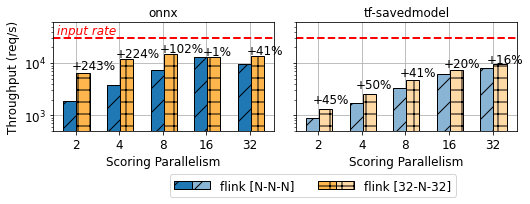

In [34]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 16
font = {'size'   : 12}
matplotlib.rc('font', **font)
alpha = 1

fig, [ax1, ax2] = plt.subplots(1, 2 ,figsize=(8.3, 2), sharey=True)

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#1F77B4', '#FFB74D'])

# ir = ['onnx', 'tf-serving']
ir = ['2', '4', '8', '16', '32']
scl_labels = ["30000_1_2", "30000_1_4", "30000_1_8", "30000_1_16", "30000_1_32"]

sc_flink_onnx = []
sc_flink_tf_serving_cpu = []
sc_ks_onnx = []
sc_ks_tf_serving_cpu = []
flink_version = "flink-32-N-32"
flink_matching = "flink"
for sc in scl_labels:
    sc_exps = final_measurements[sc]
    if "onnx" in sc_exps[flink_version]["ffnn"]:
        sc_flink_onnx.append(sc_exps[flink_version]["ffnn"]["onnx"]["throughput"])
    else:
        sc_flink_onnx.append(1)
    sc_flink_tf_serving_cpu.append(sc_exps[flink_version]["ffnn"]["tf-serving"]["throughput"])
    if flink_matching in sc_exps:
        sc_ks_onnx.append(sc_exps[flink_matching]["ffnn"]["onnx"]["throughput"])
        sc_ks_tf_serving_cpu.append(sc_exps[flink_matching]["ffnn"]["tf-serving"]["throughput"])
    else:
        sc_ks_onnx.append(1)
        sc_ks_tf_serving_cpu.append(1)

print("Parallelism on scoring operator:", ir)
print("\nMaximum throughput achieved")
print("Flink 32-N-32 ONNX:", sc_flink_onnx)
print("Flink N-N-N ONNX:", sc_ks_onnx)
print("Flink N-N-N TF-Serving-CPU:", sc_ks_tf_serving_cpu)
print("Flink 32-N-32 TF-Serving-CPU:", sc_flink_tf_serving_cpu)

i = 0
diffs_onnx = []
while i < len(sc_flink_onnx):
    baseline = sc_ks_onnx[i]
    new = sc_flink_onnx[i]
    if baseline > new:
        increase = baseline - new
        increase = increase / baseline * 100
        diffs_onnx.append('-' + str(math.floor(increase)) + '%')
    else:
        increase = new - baseline
        increase = increase / baseline * 100
        diffs_onnx.append('+' +str(math.floor(increase)) + '%')
    i = i + 1
print("Diffs onnx:", diffs_onnx) 

i = 0
diffs_tfsavedmodel = []
while i < len(sc_flink_onnx):
    baseline = sc_ks_tf_serving_cpu[i]
    new = sc_flink_tf_serving_cpu[i]
    if baseline > new:
        increase = baseline - new
        increase = increase / baseline * 100
        diffs_tfsavedmodel.append('-' + str(math.floor(increase)) + '%')
    if baseline <= new:
        increase = new - baseline
        increase = increase / baseline * 100
        diffs_tfsavedmodel.append('+' +str(math.floor(increase)) + '%')
    i = i + 1
print("Diffs tf-savedmodel:", diffs_tfsavedmodel) 

X = np.arange(len(ir))
width = 0.3

ax1.bar(X, sc_ks_onnx, width = width, label='flink [N-N-N]', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + width, sc_flink_onnx, width = width, label='flink [32-N-32]', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.set_title('onnx', fontsize=12)


hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#8AB4D4', '#FFDAA7'])

ax2.bar(X, sc_ks_tf_serving_cpu, width = width, label='flink [N-N-N]', color=next(colors), hatch = next(hatches), edgecolor='black')
ax2.bar(X + width, sc_flink_tf_serving_cpu, width = width, label='flink [32-N-32]', color=next(colors), hatch = next(hatches), edgecolor='black')
ax2.set_title('tf-savedmodel', fontsize=12)

axs = [ax1, ax2]

for ax in axs:
    ax.axhline(y=30000, color='r', linestyle='--', linewidth=2)
    ax.set_ylim((500, 60000))
    ax.set_yscale('log')
    ax.set_axisbelow(True)
    ax.grid(True)
    ax.set_xticks([i + 0.13 for i in X], ir)
    ax.set_axisbelow(True)
#     ax.set_ylim(ymax=20000)

ax1.text(-0.3, 35000, 'input rate', color='r', fontsize=12, fontstyle='oblique')
ax1.set_ylabel('Throughput (req/s)')
ax1.set_xlabel('Scoring Parallelism')
for i in range(len(sc_flink_onnx)):
    ax1.text(i + 0.05, sc_flink_onnx[i] + 1000, diffs_onnx[i])
    
for i in range(1, len(sc_flink_onnx)):
    ax2.text(i, sc_flink_tf_serving_cpu[i] + 700, diffs_tfsavedmodel[i])
ax2.text(0, sc_flink_tf_serving_cpu[0] + 350, diffs_tfsavedmodel[0])
ax2.set_xlabel('Scoring Parallelism')

    
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
labels = labels + labels2
handles = handles + handles2
unique_labels = ['flink [N-N-N]', 'flink [32-N-32]']
combined_handles = [tuple([h for h, l in zip(handles, labels) if l == label]) for label in unique_labels]

ax1.legend(handles=combined_handles, labels=unique_labels, handlelength=3,
          handler_map={tuple: HandlerTuple(ndivide=None, pad=0)}, ncol=4, loc='center left', bbox_to_anchor=(0.5, -0.5))
    
plt.subplots_adjust(wspace=0.1, hspace=0)


# ax2.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.savefig('parallelism-models.pdf', bbox_inches='tight')

# Kafka vs no Kafka

In [36]:
th_labels = ["1024_1_1", "4096_1_1", "8192_1_1"]
ir = [1024, 4096, 8192]
flink_version = "flink-32-N-32"

tfr_flink_onnx = []
tfr_flink_onnx_standalone = []
for ts_l in th_labels:
    th_exps = final_measurements[ts_l]
    if flink_version in th_exps:
        tfr_flink_onnx.append(th_exps[flink_version]["ffnn"]["onnx"]["throughput"])
        tfr_flink_onnx_standalone.append(th_exps[flink_version]["ffnn"]["standalone"]["throughput"])

print("Input rates:", ir)
print("\nMaximum throughput achieved")
print("Crayfish + Flink ONNX:", tfr_flink_onnx)
print("Flink Standalone ONNX:", tfr_flink_onnx_standalone)

Input rates: [1024, 4096, 8192]

Maximum throughput achieved
Crayfish + Flink ONNX: [4884.101950845772]
Flink Standalone ONNX: [5442.183781273582]


Kafka (Crayfish, Flink, ONNX): [151.7728431099991, 228.35736811926606, 579.3018433179723]
No Kafka (Flink, ONNX): [61.42895263509006, 92.44865864939871, 254.6467213114754]


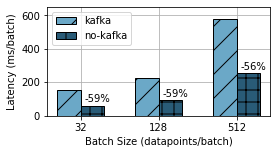

In [40]:
import math

mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 14
font = {'size'   : 10}
matplotlib.rc('font', **font)
alpha = 1

fig, ax1 = plt.subplots(1,figsize=(4, 2))

hatches = itertools.cycle(['/', '+', '//', '-', 'x', '\\', '*', 'o', 'O', '.'])
colors = itertools.cycle(['#6BA8C7', '#295B77'])

bs = ['32', '128', '512']
scl_labels = ["1_32_1", "1_128_1", "1_512_1"]
flink_version = "flink-32-N-32"

sc_flink_onnx = []
sc_flink_onnx_standalone = []
for sc in scl_labels:
    sc_exps = final_measurements[sc]
    sc_flink_onnx.append(sc_exps[flink_version]["ffnn"]["onnx"]["latency"])
    sc_flink_onnx_standalone.append(sc_exps[flink_version]["ffnn"]["standalone"]["latency"])

print("Kafka (Crayfish, Flink, ONNX):", sc_flink_onnx)
print("No Kafka (Flink, ONNX):", sc_flink_onnx_standalone)

for i in range(len(sc_flink_onnx)):
    baseline = sc_flink_onnx_standalone[i]
    new = sc_flink_onnx[i]
    increase = new - baseline
    increase = increase / baseline * 100
    
i = 0
c = []
while i < len(sc_flink_onnx):
    new = sc_flink_onnx_standalone[i]
    baseline = sc_flink_onnx[i]
    if baseline > new:
        increase = baseline - new
        increase = increase / baseline * 100
        c.append('-' + str(math.floor(increase)) + '%')
    if baseline < new:
        increase = new - baseline
        increase = increase / baseline * 100
        c.append('+' +str(math.floor(increase)) + '%')
    i = i + 1
X = np.arange(len(bs))
width = 0.3

ax1.bar(X, sc_flink_onnx, width = width, label='kafka', color=next(colors), hatch = next(hatches), edgecolor='black')
ax1.bar(X + width, sc_flink_onnx_standalone, width = width, label='no-kafka', color=next(colors), hatch = next(hatches), edgecolor='black')

for i, v in enumerate(sc_flink_onnx_standalone):
    ax1.text(i + 0.2, v + 20, c[i])

ax1.set_xticks([i + 0.15 for i in X], bs)
ax1.set_ylim(ymax=650)
ax1.legend(ncol=1)
ax1.set_xlabel('Batch Size (datapoints/batch)')
ax1.set_ylabel('Latency (ms/batch)')
ax1.set_axisbelow(True)
ax1.grid(True)
plt.savefig('flink-onnx-standalone-latency-comparison.pdf', bbox_inches='tight')

### Bursty Workloads Analysis

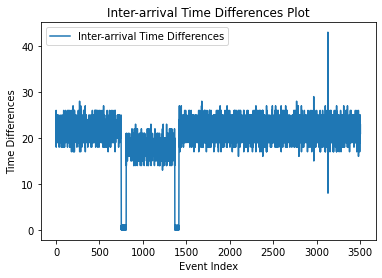

In [4]:
import csv
import matplotlib.pyplot as plt

# Specify the path to your CSV file
# csv_file_path = '../results/flink/ffnn/onnx/20231218113054684-ir600-bs1-mr1.csv'

csv_file_path = '../results/flink/ffnn/onnx/20231218132341222-ir50-bs1-mr1.csv'

# Lists to store the data from the CSV file
timestamps = []
timestamps2 = []

# Read the CSV file and extract timestamps
with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        # Assuming your CSV file has a timestamp in the first column
        timestamps.append(int(row[0]))
        timestamps2.append(int(row[1]))
        
timestamps.sort()

timestamps = timestamps[2000:]

# print(timestamps)

# print(timestamps[-1] - timestamps[0])

# Calculate time differences between consecutive events
time_diffs = [timestamps[i] - timestamps[i - 1] for i in range(1, len(timestamps))]

# Plotting the time differences
plt.plot(time_diffs, label='Inter-arrival Time Differences')

# Adding labels and title
plt.xlabel('Event Index')
plt.ylabel('Time Differences')
plt.title('Inter-arrival Time Differences Plot')

# Adding a legend
plt.legend()

# Display the plot
plt.show()